In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import zipfile
import gdown

In [ ]:
# get the images
root_path = './'
url = 'https://drive.google.com/uc?id=1j5fCPgh0gnY6v7ChkWlgnnHH6unxuAbb'
output = 'img.zip'
gdown.download(url, output, quiet=False)
with zipfile.ZipFile("img.zip","r") as zip_ref:
    zip_ref.extractall(root_path)

Downloading...
From: https://drive.google.com/uc?id=1j5fCPgh0gnY6v7ChkWlgnnHH6unxuAbb
To: /content/img.zip
100%|██████████| 2.68G/2.68G [00:25<00:00, 105MB/s]


In [ ]:
category_list = []
image_path_list = []
data_type_list = []
# category names
with open('list_category_cloth.txt', 'r') as f:
    for i, line in enumerate(f.readlines()):
        if i > 1:
            category_list.append(line.split(' ')[0])

# category map
with open('list_category_img.txt', 'r') as f:
    for i, line in enumerate(f.readlines()):
        if i > 1:
            image_path_list.append([word.strip() for word in line.split(' ') if len(word) > 0])


# train, valid, test
with open('list_eval_partition.txt', 'r') as f:
    for i, line in enumerate(f.readlines()):
        if i > 1:
            data_type_list.append([word.strip() for word in line.split(' ') if len(word) > 0])

In [ ]:
data_df = pd.DataFrame(image_path_list, columns=['image_path', 'category_number'])

In [ ]:
default_value = 0  # Replace with your desired default value
data_df['category_number'] = data_df['category_number'].fillna(default_value).astype(int)

In [ ]:
data_df['category_number'] = data_df['category_number'].astype(int)
data_df = data_df.merge(pd.DataFrame(data_type_list, columns=['image_path', 'dataset_type']), on='image_path')
data_df['category'] = data_df['category_number'].apply(lambda x: category_list[int(x) - 1])
data_df = data_df.drop('category_number', axis=1)
data_df.head()

,image_path,dataset_type,category
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,train,Blouse
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,train,Blouse
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,val,Blouse
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,train,Blouse
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,test,Blouse


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136916 entries, 0 to 136915
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   image_path    136916 non-null  object
 1   dataset_type  136916 non-null  object
 2   category      136916 non-null  object
dtypes: object(3)
memory usage: 4.2+ MB


In [ ]:
X=data_df.drop(['category'],axis=1)

In [ ]:
y=data_df['category']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [ ]:
X_train.head()

,image_path,dataset_type
39030,img/Southwestern-Patterned_Poncho/img_00000033...,train
133486,img/Boxy_Baseball_Tee/img_00000031.jpg,train
102856,img/Heathered_Tank/img_00000009.jpg,train
88845,img/Faux_Fur_Collar_Cardigan/img_00000020.jpg,train
26650,img/Ombr&eacute;_Dolman_Button-Down_Blouse/img...,train


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols=['image_path','dataset_type' ])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,image_path,dataset_type
39030,1,1
133486,2,1
102856,3,1
88845,4,1
26650,5,1


In [ ]:
y_train.head()

39030       Poncho
133486         Tee
102856        Tank
88845     Cardigan
26650       Blouse
Name: category, dtype: object

In [ ]:
y_test.head()

104845    Cardigan
68404          Top
82698          Tee
78338         Tank
9310        Blouse
Name: category, dtype: object

In [ ]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print('Model accuracy score with 10 decision-trees : ', accuracy)

Model accuracy score with 10 decision-trees :  0.20162450479162516


**Decision Tree**

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model=DecisionTreeClassifier(max_depth=2)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[0] <= 105420.5\ngini = 0.874\nsamples = 105426\nvalue = [108, 5266, 17196, 208, 231, 9320, 86, 23, 185, 216\n10, 484, 2853, 7335, 1000, 139, 533, 692, 516, 461\n61, 520, 2625, 1520, 9168, 663, 148, 10756, 25847\n7105, 52, 99]'),
 Text(0.25, 0.5, 'x[0] <= 21433.5\ngini = 0.874\nsamples = 105420\nvalue = [108, 5266, 17196, 208, 231, 9320, 86, 23, 185, 216\n10, 484, 2853, 7335, 1000, 139, 533, 692, 516, 460\n61, 520, 2625, 1520, 9168, 663, 148, 10756, 25842\n7105, 52, 99]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.87\nsamples = 21433\nvalue = [28, 1064, 3632, 39, 48, 1913, 18, 2, 41, 39, 3\n91, 589, 1438, 197, 27, 84, 129, 97, 79, 10, 88\n507, 302, 1881, 128, 26, 2113, 5346, 1442, 7, 25]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.875\nsamples = 83987\nvalue = [80, 4202, 13564, 169, 183, 7407, 68, 21, 144, 177\n7, 393, 2264, 5897, 803, 112, 449, 563, 419, 381\n51, 432, 2118, 1218, 7287, 535, 122, 8643, 20496\n5663, 45, 74]'),
 Text(0.75, 0.5, 'x[1]

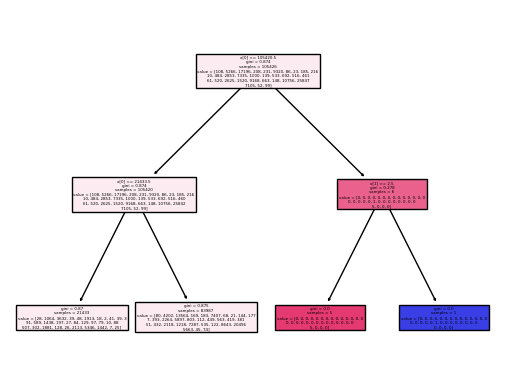

In [ ]:
tree.plot_tree(model,filled=True)

**KNN**

In [ ]:
##KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

Text(0, 0.5, 'cross_validation_accuracy')

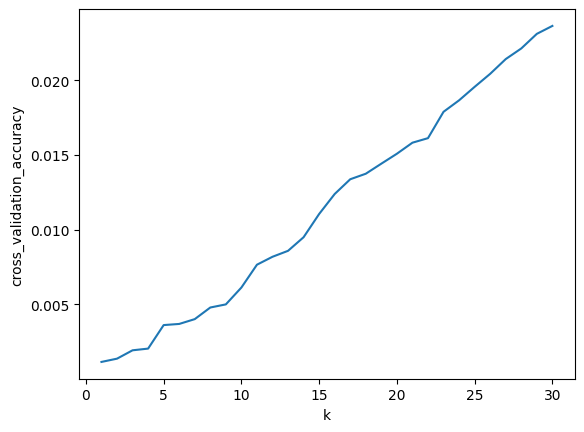

In [ ]:
k_range=range(1,31)
cv_scores=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
  cv_scores.append(scores.mean())
plt.plot(k_range,cv_scores)
plt.xlabel('k')
plt.ylabel('cross_validation_accuracy')

**SVM**

In [ ]:
#SVM
from sklearn.preprocessing import Binarizer
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
clf = SVC(class_weight='balanced', kernel='rbf')
clf.fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred = clf.predict(X_test)
binarizer = Binarizer(threshold=0.5)
y_test_binary = binarizer.fit_transform(y_test.reshape(-1, 1)).ravel()
accuracy = clf.score(X_test, y_test_binary)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f%%" % (f1 * 100.0))

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Visualization**

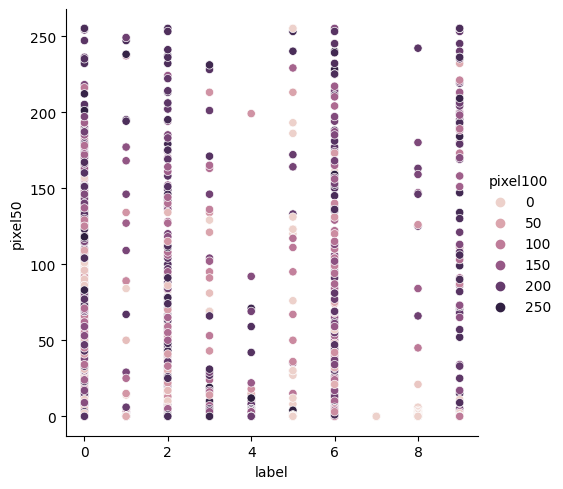

In [ ]:
sns.relplot(x="label",y="pixel50",hue="pixel100",data=data_train)

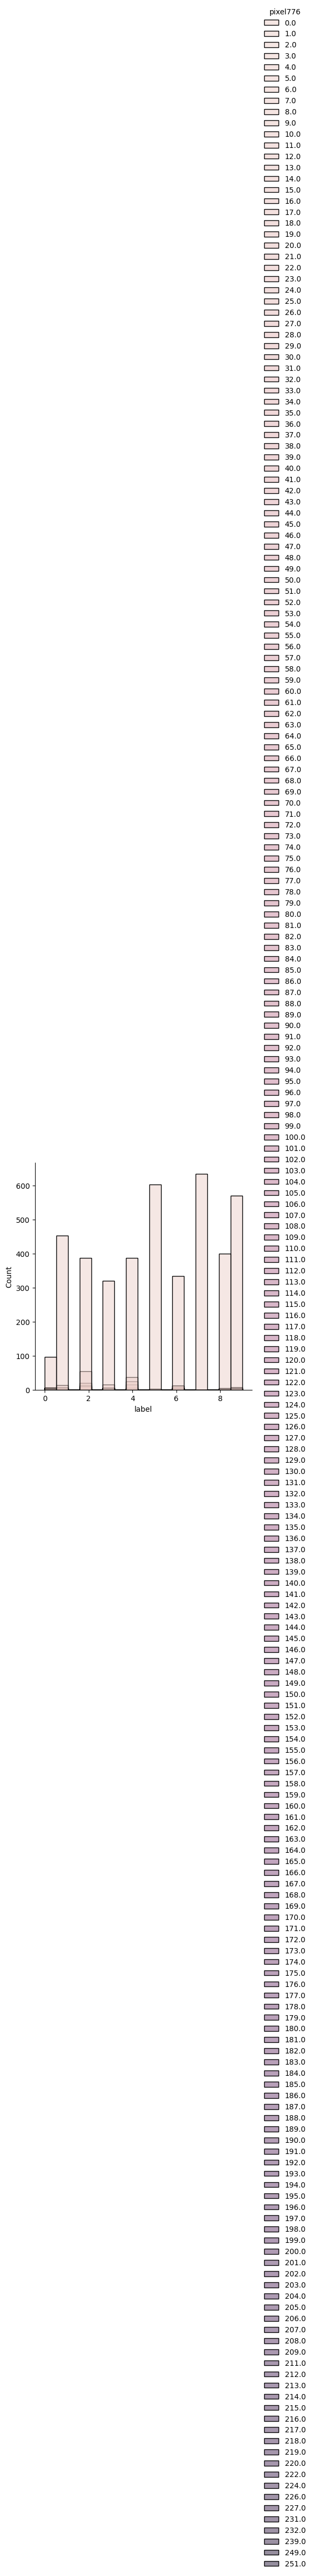

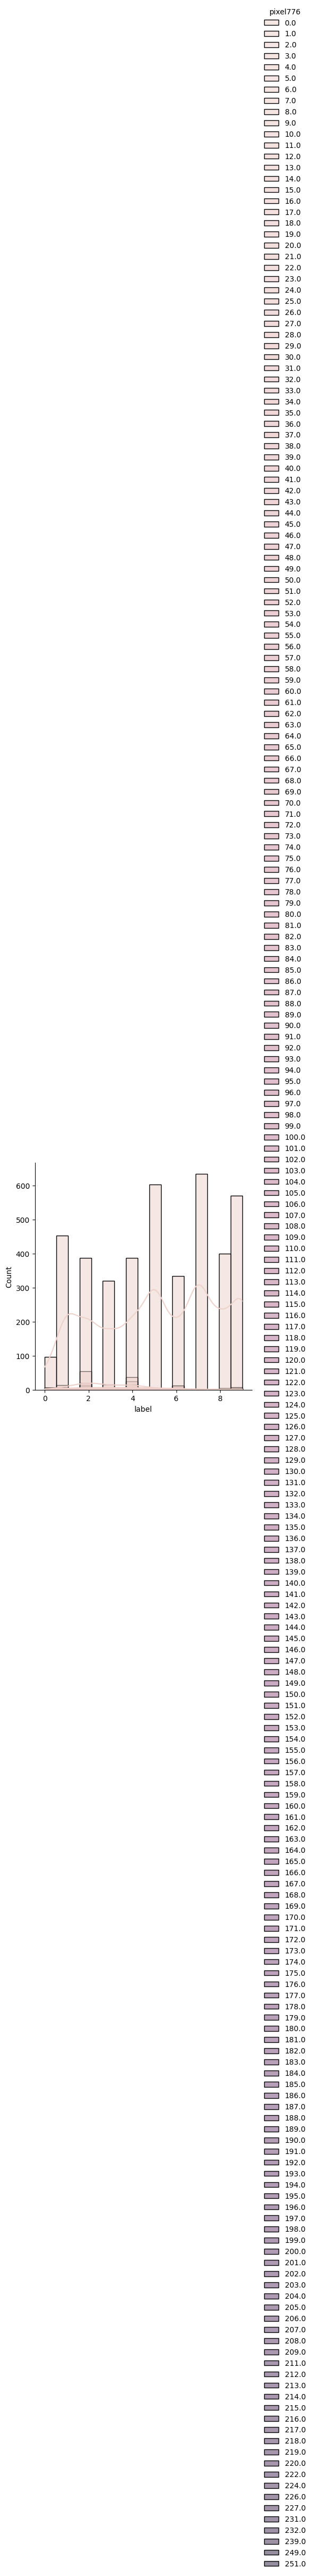

In [ ]:
sns.displot(data_train,x="label",hue="pixel776")
sns.displot(data_train,x="label",kde=True,hue="pixel776")

<Axes: xlabel='label', ylabel='pixel7'>

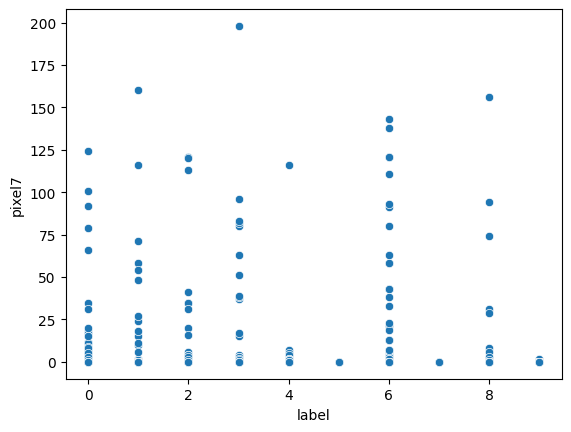

In [ ]:
#Linearity and Normality
sns.scatterplot(x="label",y="pixel7",data=data_train)

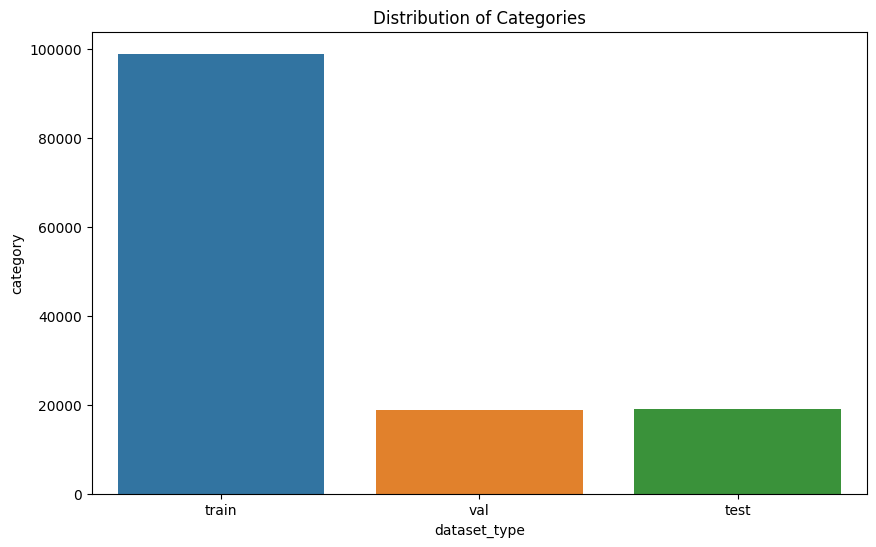

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_df, x='dataset_type')
plt.xlabel('dataset_type')
plt.ylabel('category')
plt.title('Distribution of Categories')
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 3.77779720
Iteration 2, loss = 2.74447890
Iteration 3, loss = 2.71233194
Iteration 4, loss = 2.71236739
Iteration 5, loss = 2.71237485
Iteration 6, loss = 2.71243931
Iteration 7, loss = 2.71251875
Iteration 8, loss = 2.71238736
Iteration 9, loss = 2.71241139
Iteration 10, loss = 2.71246275
Iteration 11, loss = 2.71236063
Iteration 12, loss = 2.71249872
Iteration 13, loss = 2.71250526
Iteration 14, loss = 2.71247285
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [ ]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.24872359307109845

In [ ]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load training and test data into dataframes
data_train = pd.read_csv('/content/fashion-mnist_train.csv')
data_test = pd.read_csv('/content/fashion-mnist_test.csv')

# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

<Axes: >

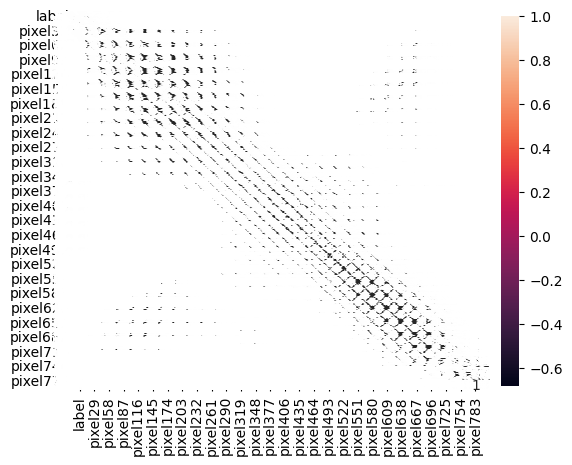

In [ ]:
#Heatmap
sns.heatmap(data_train.corr(),annot=True)

In [ ]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))

cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
history1 = cnn1.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/10
12/12 [==============================] - 3s 134ms/step - loss: nan - accuracy: 0.1268 - val_loss: nan - val_accuracy: 0.1016
Epoch 2/10
12/12 [==============================] - 1s 111ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.1016
Epoch 3/10
12/12 [==============================] - 1s 120ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.1016
Epoch 4/10
12/12 [==============================] - 1s 115ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.1016
Epoch 5/10
12/12 [==============================] - 1s 115ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.1016
Epoch 6/10
12/12 [==============================] - 1s 112ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.1016
Epoch 7/10
12/12 [==============================] - 2s 166ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.1016
Epoch 8/10
12/12 [==============================

In [ ]:
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: nan
Test accuracy: 0.09861143678426743


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=256)
val_batches = gen.flow(X_val, y_val, batch_size=256)

In [ ]:
history1 = cnn1.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)

Epoch 1/50


<ipython-input-12-d49d5baf93c6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = cnn1.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,


187/187 [==============================] - 48s 255ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.1016
Epoch 2/50
187/187 [==============================] - 47s 252ms/step - loss: nan - accuracy: 0.1036 - val_loss: nan - val_accuracy: 0.1011
Epoch 3/50
187/187 [==============================] - 47s 251ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.1024
Epoch 4/50
187/187 [==============================] - 46s 247ms/step - loss: nan - accuracy: 0.1036 - val_loss: nan - val_accuracy: 0.1018
Epoch 5/50
187/187 [==============================] - 47s 251ms/step - loss: nan - accuracy: 0.1035 - val_loss: nan - val_accuracy: 0.1019
Epoch 6/50
187/187 [==============================] - 47s 252ms/step - loss: nan - accuracy: 0.1036 - val_loss: nan - val_accuracy: 0.1016
Epoch 7/50
187/187 [==============================] - 48s 253ms/step - loss: nan - accuracy: 0.1038 - val_loss: nan - val_accuracy: 0.1020
Epoch 8/50
187/187 [==================

In [ ]:
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: nan
Test accuracy: 0.09861143678426743


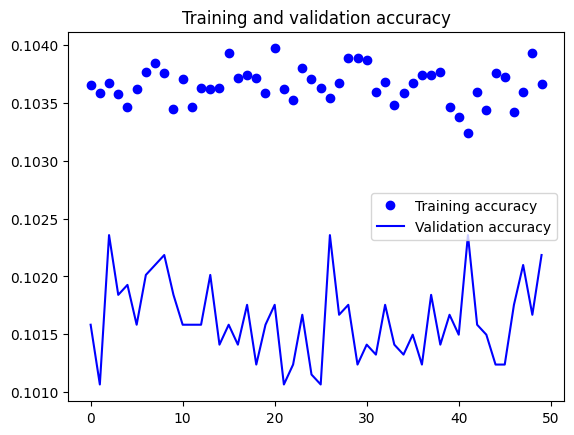

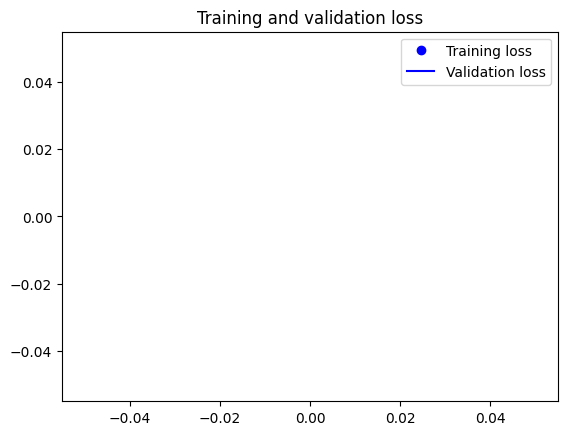

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
y_true = data_test.iloc[:, 0].values

In [ ]:
# Assuming your label column is the first column in data_test
y_true = data_test.iloc[:, 0].values

# Get the predicted probabilities for each class
predicted_probabilities = cnn1.predict(X_test)

# Get the predicted classes based on the maximum probability
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Rest of your code to calculate correct and incorrect indices
correct = np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]

133/133 [==============================] - 1s 9ms/step


In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.10      1.00      0.18       419
     Class 1       0.00      0.00      0.00       409
     Class 2       0.00      0.00      0.00       406
     Class 3       0.00      0.00      0.00       442
     Class 4       0.00      0.00      0.00       421
     Class 5       0.00      0.00      0.00       431
     Class 6       0.00      0.00      0.00       450
     Class 7       0.00      0.00      0.00       403
     Class 8       0.00      0.00      0.00       437
     Class 9       0.00      0.00      0.00       431

    accuracy                           0.10      4249
   macro avg       0.01      0.10      0.02      4249
weighted avg       0.01      0.10      0.02      4249



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-26-315aa10af8fc>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


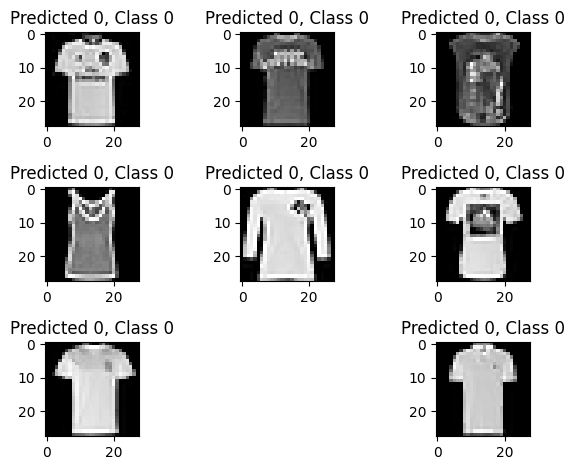

In [ ]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

<ipython-input-27-9f3222ebd940>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


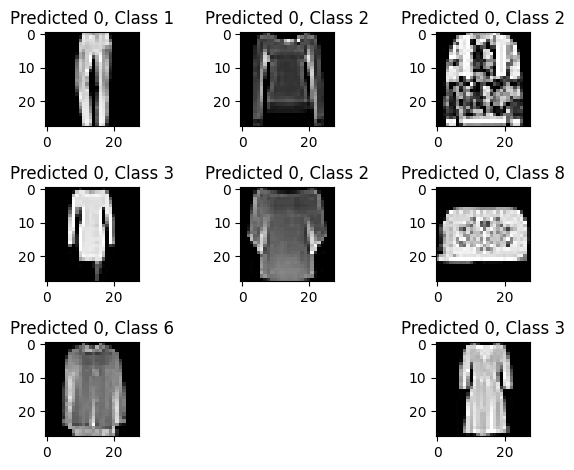

In [ ]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

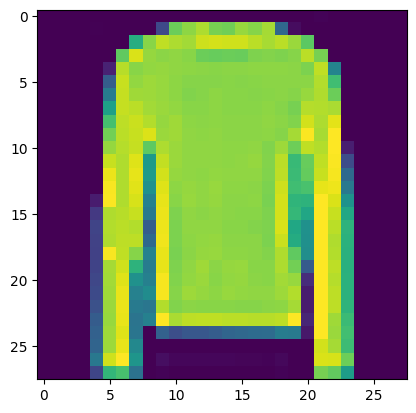

In [ ]:
test_im1 = X_train[100]
plt.imshow(test_im1.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

1/1 [==============================] - 0s 149ms/step


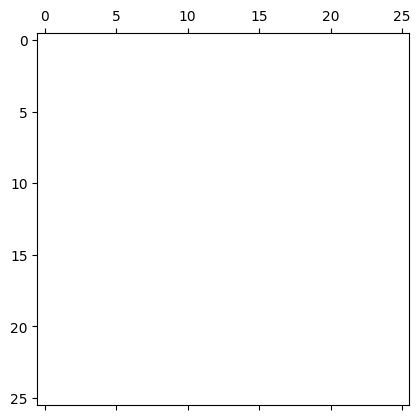

In [ ]:
from keras import models
import matplotlib.pyplot as plt
import numpy as np
layer_outputs = [layer.output for layer in cnn1.layers[:8]]

# Create a model that will return these outputs, given the model input
activation_model = models.Model(inputs=cnn1.input, outputs=layer_outputs)

# Prepare a test image (assuming test_im1 is your test image)
# Replace this with your actual test image data
test_im1 = np.random.rand(28, 28, 1)  # Example random image, change this line

# Reshape the test image to match the model's input shape (28x28x1 in this case)
test_im1 = test_im1.reshape(1, 28, 28, 1)

# Get activations for each layer
activations = activation_model.predict(test_im1)

# Activation of the 1st convolutional layer
first_layer_activation = activations[0]

# Display the 4th channel of the activation of the 1st layer
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()

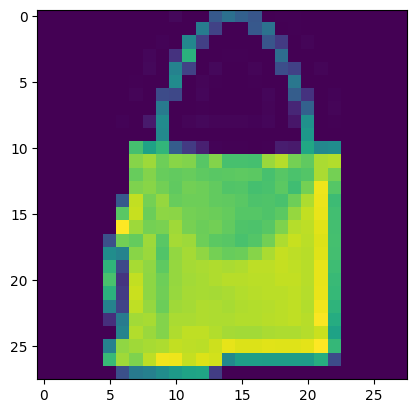

In [ ]:
test_im2 = X_train[500]
plt.imshow(test_im2.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

1/1 [==============================] - 0s 41ms/step


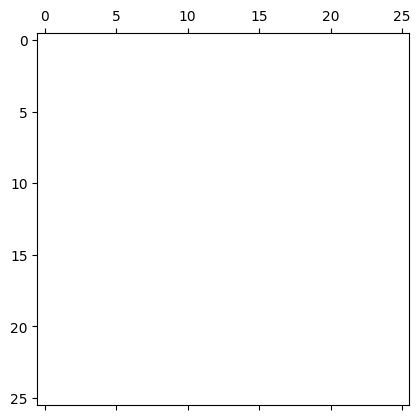

In [ ]:
activations = activation_model.predict(test_im2.reshape(1,28,28,1))
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

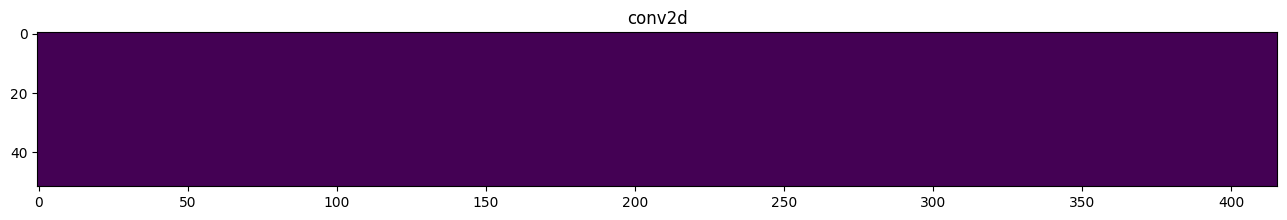

In [ ]:
layer_names = []
for layer in cnn1.layers[:-1]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')